In [2]:


import numpy as np

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline




In [3]:


n_initial = 100



In [4]:


X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)



In [5]:
X_train.shape

(1347, 64)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling, entropy_sampling

learner = ActiveLearner(estimator=RandomForestClassifier(),
                        query_strategy=entropy_sampling,
                        X_training=X_train, y_training=y_train
                        )

In [7]:
n_queries = 20

[260]
(1, 64)
[[ 0.  0.  7. 15. 12.  0.  0.  0.]
 [ 0.  3. 15.  8. 14.  2.  0.  0.]
 [ 0.  0.  5.  2. 11.  0.  0.  0.]
 [ 0.  0.  1. 11.  8.  2.  0.  0.]
 [ 0.  0.  8. 16. 16. 15.  4.  0.]
 [ 0.  0.  1.  4.  2. 12.  6.  0.]
 [ 0.  0.  2.  4. 13. 12.  0.  0.]
 [ 0.  0.  5. 13.  9.  1.  0.  0.]]


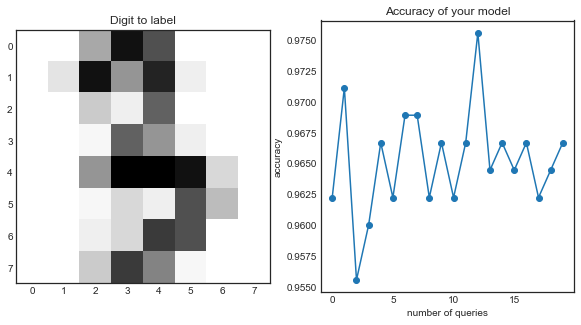

Which digit is this?


In [8]:


accuracy_scores = [learner.score(X_test, y_test)]

for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Digit to label')
        plt.imshow(query_inst.reshape(8, 8))
        print(query_idx)
        print(query_inst.shape)
        print(query_inst.reshape(8,8))
        plt.subplot(1, 2, 2)
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')

    print("Which digit is this?")
    y_new = np.array([int(input())], dtype=str)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))



In [11]:
print(accuracy_scores)

[0.9622222222222222, 0.9711111111111111, 0.9555555555555556, 0.96, 0.9666666666666667, 0.9622222222222222, 0.9688888888888889, 0.9688888888888889, 0.9622222222222222, 0.9666666666666667, 0.9622222222222222, 0.9666666666666667, 0.9755555555555555, 0.9644444444444444, 0.9666666666666667, 0.9644444444444444, 0.9666666666666667, 0.9622222222222222, 0.9644444444444444, 0.9666666666666667, 0.9644444444444444]


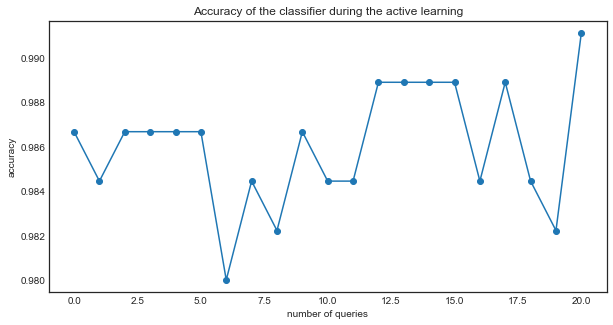

In [21]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.title('Accuracy of the classifier during the active learning')
    plt.plot(range(n_queries+1), accuracy_scores)
    plt.scatter(range(n_queries+1), accuracy_scores)
    plt.xlabel('number of queries')
    plt.ylabel('accuracy')
    plt.show()